Azis Muslim

-Batch 013 FTDS PHASE 1
-MILESTONE 2 
-Dataset : Airplane Delay

### Analsis Model Classifier Machine Leaning Dalam Memprediksi Delay Dan Non Delay Airport 

Dewasa ini pesawat adalah salah satu transportasi dengan mobilitas tinggi dimana kita bisa bepergian dari suatu pulau ke pulau lain dalam waktu singkat yang mana hal ini akan sulit dilakukan dengan menggunakan transportasi darat. Dibalik kemampuan transportasi udara untuk memenuhi permintaan para penumpang dengan mobilitas yang tinggi transportasi ini masih memiliki kekurangan dalam hal kenyamanan dan efisiensi waktu, seperti yang kita tahu biarpun transportasi udara menawarkan perjalanan waktu yang singkat namun seringkali permasalahan delay keberangkatan tidak dapat dihindari. Pada penelitian ini akan dilakukan eksplorasi model model machine learning classifier untuk memprediksi delay yang hasil nya diharapkan dapat membuat transportasi udara ini bisa berjalan lebih efisien dan dapat meningkatkan kenyamanan para penumpang dengan mobilitas tinggi.

#### Link Dataset

https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import OrdinalEncoder
import pickle

#### Loading Dataset

In [2]:
df = pd.read_csv('data_test_flight_delay.csv')
df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1996,3787,3185,250321,250322,WN,1537,SAN,MDW,3,840,235,1
1,1941,3019,184,175449,175450,UA,415,MSY,DEN,6,420,186,0
2,2924,4468,1723,152813,152814,XE,2565,CLT,IAH,4,1105,175,0
3,1879,3467,4828,41376,41377,WN,588,PIT,BWI,5,625,60,0
4,81,1808,4783,429662,429663,OO,6491,LAX,SMF,6,1100,81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3978,2824,4560,408083,408084,OO,6687,SFO,MRY,5,631,46,0
4996,1552,1689,4757,518526,518527,XE,2300,TUL,IAH,4,1002,97,0
4997,1078,1065,748,106542,106543,UA,860,IAD,BOS,2,514,96,0
4998,2352,1738,2303,378456,378457,AA,2454,LAX,DFW,3,1005,180,1


Setelah dilakukan dataset dapat terlihat pada dataset di atas terdapat 5000 baris dan 13 kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.3  5000 non-null   int64 
 1   Unnamed: 0.2  5000 non-null   int64 
 2   Unnamed: 0.1  5000 non-null   int64 
 3   Unnamed: 0    5000 non-null   int64 
 4   id            5000 non-null   int64 
 5   Airline       5000 non-null   object
 6   Flight        5000 non-null   int64 
 7   AirportFrom   5000 non-null   object
 8   AirportTo     5000 non-null   object
 9   DayOfWeek     5000 non-null   int64 
 10  Time          5000 non-null   int64 
 11  Length        5000 non-null   int64 
 12  Delay         5000 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 507.9+ KB


Informasi di atas digunakan untuk melihat apakah data pada setiap kolom nya sudah sesuai atau belum

In [4]:
# Untuk melihat kolom apa saja yang terdapat pada dataset
df.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id',
       'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

In [5]:
df.select_dtypes(include=np.number).columns.tolist()

['Unnamed: 0.3',
 'Unnamed: 0.2',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'id',
 'Flight',
 'DayOfWeek',
 'Time',
 'Length',
 'Delay']

In [6]:
df['AirportFrom'].unique()

array(['SAN', 'MSY', 'CLT', 'PIT', 'LAX', 'MSP', 'LAS', 'DEN', 'BUF',
       'MCO', 'ATL', 'DTW', 'PHX', 'ORD', 'MEM', 'RDU', 'BNA', 'YUM',
       'ALB', 'PDX', 'MKE', 'PSC', 'IAH', 'LGA', 'ORF', 'DFW', 'CMH',
       'MDW', 'EWR', 'SLC', 'HOU', 'PBI', 'SFO', 'SYR', 'FLL', 'MIA',
       'DCA', 'LFT', 'BOS', 'OMA', 'ROC', 'JFK', 'BWI', 'LIH', 'BTR',
       'CVG', 'SEA', 'HNL', 'CLE', 'TPA', 'IAD', 'ITO', 'TUL', 'SNA',
       'PHL', 'SMF', 'BUR', 'FSD', 'PVD', 'ABQ', 'MOB', 'SBA', 'KOA',
       'LGB', 'MCI', 'OAK', 'DAY', 'TUS', 'OGG', 'SAT', 'BHM', 'GEG',
       'TEX', 'FSM', 'PLN', 'MDT', 'BOI', 'BDL', 'PNS', 'ONT', 'RNO',
       'STL', 'TVC', 'OKC', 'XNA', 'OME', 'SRQ', 'DLH', 'CRW', 'SJC',
       'CPR', 'RSW', 'SDF', 'HRL', 'AUS', 'IND', 'SAF', 'JAX', 'ANC',
       'DRO', 'MGM', 'GTF', 'AMA', 'MLI', 'GSO', 'RIC', 'SJU', 'COS',
       'LEX', 'FAY', 'DAL', 'CRP', 'MSO', 'CAE', 'GNV', 'LIT', 'GCC',
       'AZO', 'GRB', 'ATW', 'EVV', 'MHK', 'VPS', 'ABY', 'HDN', 'CHO',
       'ILM', 'ELP',

In [7]:
df['AirportTo'].unique()

array(['MDW', 'DEN', 'IAH', 'BWI', 'SMF', 'SEA', 'MSP', 'MCI', 'ORD',
       'IAD', 'BNA', 'ABE', 'FLG', 'ATL', 'PHX', 'CRW', 'TPA', 'PHL',
       'LAX', 'SRQ', 'SFO', 'MEM', 'SAN', 'COS', 'RDU', 'PNS', 'BOI',
       'SLC', 'HNL', 'SJC', 'SJU', 'DAL', 'LSE', 'OMA', 'PDX', 'JFK',
       'LGA', 'MSY', 'STL', 'BTV', 'AUS', 'DTW', 'ICT', 'DCA', 'DFW',
       'ECP', 'SDF', 'LAS', 'BDL', 'KOA', 'HOU', 'SHV', 'CLT', 'BOS',
       'MFE', 'ONT', 'SBA', 'FLL', 'AVL', 'MCO', 'ITO', 'BUF', 'FAT',
       'BMI', 'RNO', 'JAX', 'ACT', 'OAK', 'LIT', 'ELP', 'EWR', 'XNA',
       'IND', 'MKE', 'FCA', 'SNA', 'TYS', 'SYR', 'CMH', 'ANC', 'AMA',
       'LGB', 'DAY', 'OGG', 'OKC', 'CLD', 'TUL', 'GRK', 'CLE', 'PSC',
       'BUR', 'PIT', 'GSO', 'JAN', 'CVG', 'RSW', 'DRO', 'SAT', 'MIA',
       'DLH', 'EVV', 'ACV', 'GSP', 'ABQ', 'VPS', 'MAF', 'STX', 'PBI',
       'GRR', 'CLL', 'MSN', 'ALB', 'TLH', 'TRI', 'ORF', 'TOL', 'PHF',
       'HRL', 'FAR', 'GNV', 'RIC', 'MOT', 'TUS', 'GJT', 'FWA', 'JAC',
       'MHT', 'BHM',

In [83]:
df['Airline'].unique()

array(['WN', 'UA', 'XE', 'OO', 'DL', 'F9', 'EV', '9E', 'US', 'YV', 'MQ',
       'OH', 'AS', 'FL', 'AA', 'CO', 'B6', 'HA'], dtype=object)

In [8]:
# dilakukan dropping unnamned 
df = df[['id','Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time','Length', 'Delay']]
df.head(5)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,250322,WN,1537,SAN,MDW,3,840,235,1
1,175450,UA,415,MSY,DEN,6,420,186,0
2,152814,XE,2565,CLT,IAH,4,1105,175,0
3,41377,WN,588,PIT,BWI,5,625,60,0
4,429663,OO,6491,LAX,SMF,6,1100,81,1


#### Explanatory Data Analysis

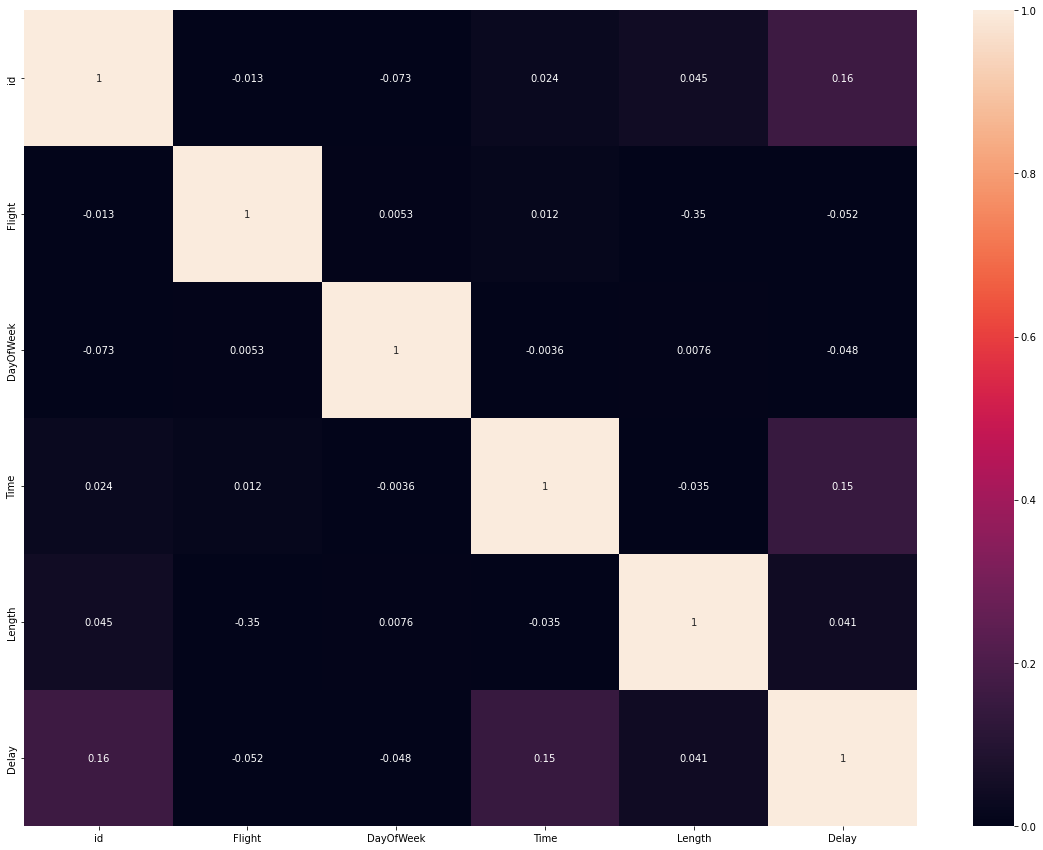

In [9]:
corr = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

Berdasarkan EDA di atas dapat terlihat fitur fitur yang memiliki korelasi positif yang kuat dengan fitur delay adalah id, time, dan length. Dikarenakan fitur-fitur tersebut memiliki korelasi positif dengan fitur delay maka akan dijadikan sebagai variabel independent pada penelitian ini dalam memprediksi delay.

<AxesSubplot:xlabel='Delay', ylabel='count'>

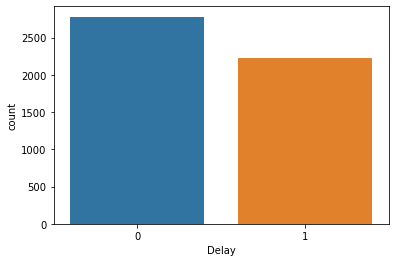

In [10]:
sns.countplot(df['Delay'])

Berdasrkan barplot di atas dapat terlihat terdapat data imbalance untuk variabel independent namun karena tidak terlalu signifikan perbedaanya maka tidak dilakukan handling imbalance data.

[Text(0.5, 1.0, 'Frequency of flights per day')]

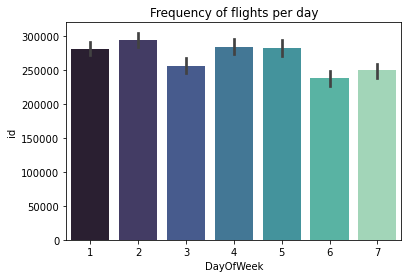

In [11]:
#Trend of the flight per day
sns.barplot(x='DayOfWeek',y='id',data=df, palette='mako').set(title='Frequency of flights per day')

Berdasarkan gambar di atas gambar barplot di atas dapat frekuensi penerbangan paling tinggi dalam satu minggu ada pada hari kedua, hal ini dapat dilihat pada barplot berwarna ungu di atas dimana frequensinya hampir mencapai 300.000

<AxesSubplot:xlabel='Flight', ylabel='Count'>

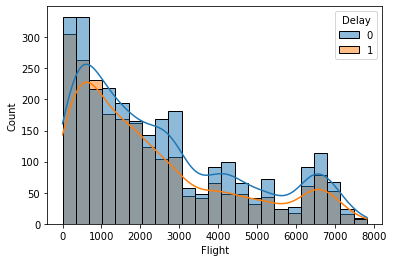

In [12]:
sns.histplot(data=df, x='Flight', hue='Delay', kde=True)

Berdasarkan gambar di atas dapat terlihat distribusi data penerbangan antara yang mengalami delay dan non delay sama-sama terdistribusi right skewed

<AxesSubplot:xlabel='Time', ylabel='Count'>

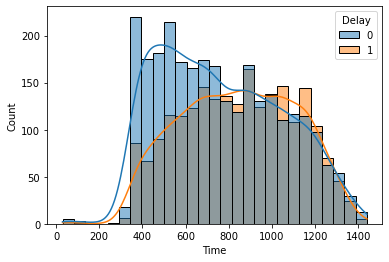

In [13]:
sns.histplot(data=df, x='Time', hue='Delay', kde=True)

Pada saat dilakukan plot distribusi untu Time dapat terlihat terdapat sedikit perbedaan distribusi data Time yang mengalami delay dan non delay namun secara umum distribusinya normal.

<AxesSubplot:xlabel='Length', ylabel='Count'>

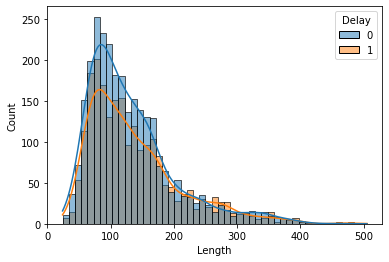

In [14]:
sns.histplot(data=df, x='Length', hue='Delay', kde=True)

Berdasrkan plot distribusi di atas dapat terlihat untuk fitur length distribusinya cenderung left skewed dan dapat terlihat tidak ada perbedaan distribusi yang signifikan untuk distribusi length yang mengalami delay dan length yang mengalami non delay

<AxesSubplot:xlabel='Airline', ylabel='count'>

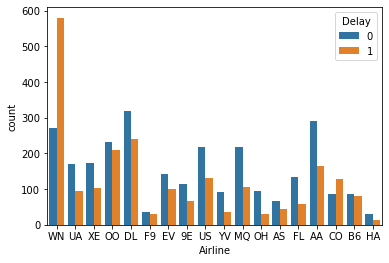

In [15]:
sns.countplot(data=df, x='Airline', hue='Delay')

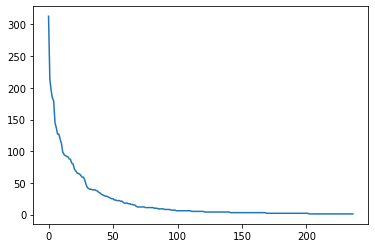

In [16]:
airfrom = df['AirportFrom'].value_counts()
plt.plot(range(len(airfrom)), airfrom)

Grafik di atas digunakan untuk melihar range dari Airport From

In [17]:
df['AirportFrom'] = df['AirportFrom'].apply(lambda s: s if str(s) in airfrom[:50] else 'others')

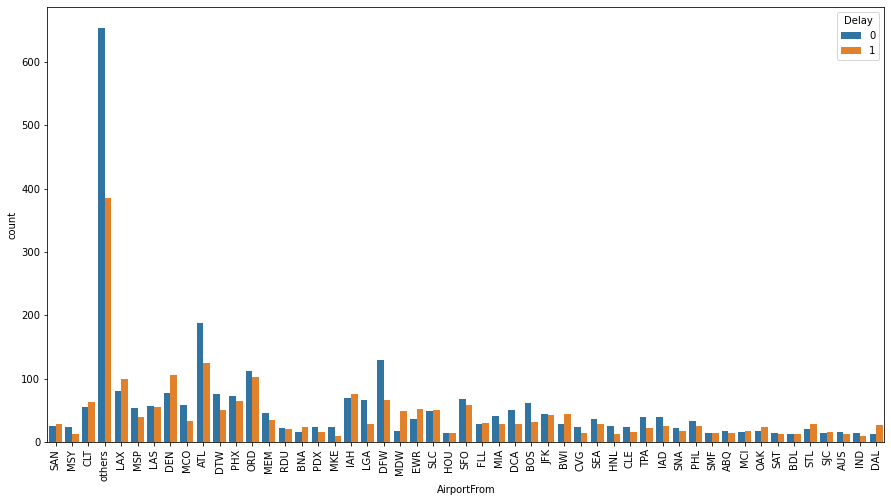

In [18]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportFrom', hue='Delay')
plt.xticks(rotation=90)
plt.show()

Histogram di atas menjelaskan delay rate dan non delay rate untuk departure airport. Berdasrkan histogram di atas dapat terlihat bandara keberangkatan yang trafficnya paling tinggi adalah ATL atau Hartsfield-Jackson Atlanta International Airport - Georgia, dimana pada airport tersebut juga tingkat delay nya paling tinggi. Namun jika dilihat dari delay to non delay ratio dimana ratio ini menjelaskan semakin tinggi angkanya semakin tinggi kemungkinannya untuk mengalami delay. Airport yang ratio delay to non delay nya tinggi adalah MDW atau Chicago Midway International Airport - Illinois.

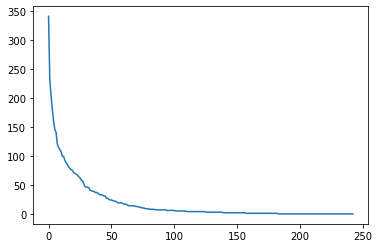

In [19]:
airto = df['AirportTo'].value_counts()
plt.plot(range(len(airto)), airto)

Grafik di atas digunakan untuk melihar range dari Airport To

In [20]:
df['AirportTo'] = df['AirportTo'].apply(lambda s: s if str(s) in airto[:50] else 'others')

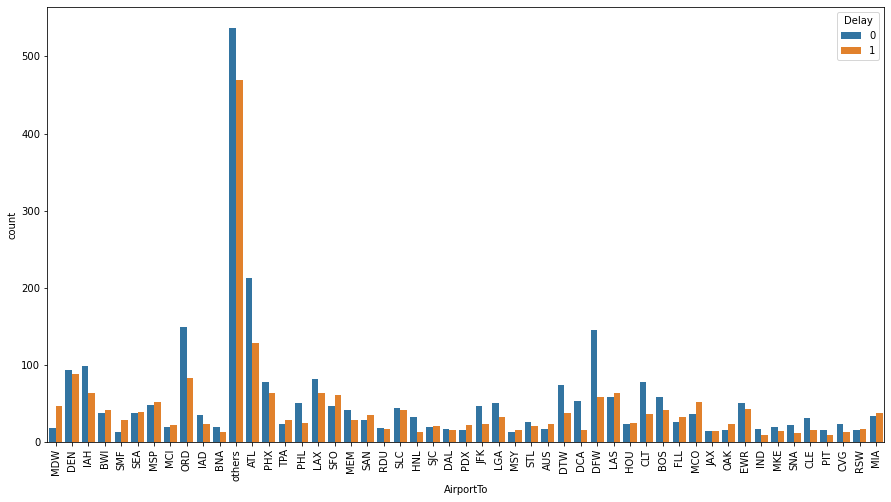

In [21]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportTo', hue='Delay')
plt.xticks(rotation=90)
plt.show()

Histogram di atas menjelaskan mengenai delay rate dan non delay rate pada destination airport. Berdasarkan gambar di atas dapat terlihat Airport yang ratio non delay to delay nya paling rendah adalah DCA Ronald Reagan Washington National Airport - Arlington, Virginia. Rasio non delay to delay menjelaskan semakin tinggi angkanya semakin munggin pesawatnya tidak delay. Sedangkan untuk airport yang rate delay nya tertinggi adalah ATL Hartsfield-Jackson Atlanta International Airport - Georgia. Jika dikaitkan dengan barplot sebelumnya yang menjelaskan airport dalay di airport from maka dapat terlihat delay pada airport from akan memengaruhi delay pada airport to sehingga untuk menghindari adanya multikolinieritas pada variabel-variabel independent yang akan digunakan untuk memprediksi delay yang dalam konteks ini akan dijadikan variabel dependent maka fitur Airport From dan Airport To tidak digunakan.

In [22]:
#Creating the Features and independent variable
df
X=pd.DataFrame({'DayOfWeek': df['DayOfWeek'],
                'Time': df['Time'],
                'Length': df['Length']            
               })
y=df['Delay']

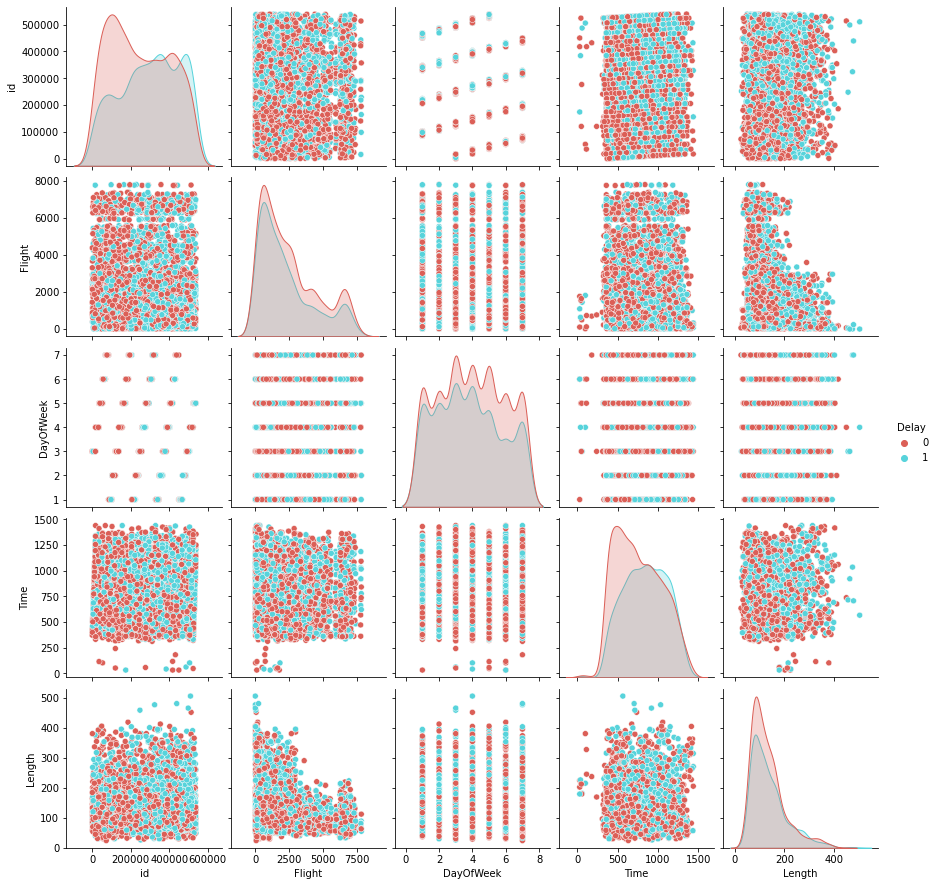

In [23]:
sns.pairplot(data=df, hue='Delay', palette='hls' )

Berdasarkan scatterplot matrix baris pertama di atas dapat terlihat tidak ada hubungn korelasi antara id dengan flight, DayOfWeek, Time, dan Length. Hal ini terlihat dari persebaran data scatterpolotnya yang tidak membentuk garis linier baik downward sloping maupun upward sloping. Bergeser ke baris kedua dapat terlihat adanya korelasi negatif antara Flight dan Lenth hal ini dapat terlihat dari scatterplotnya yang membentuk garis downward sloping. Selanjutnya bergesar ke baris ketiga, pada baris ke tiga ini tidak ada pola scatterplot yang menunjukkan keterkaitan antara fitur DayOfWeek dengan fitur id, Flight, DayOfWeek, Time, dan Length. Berpindah ke baris ke empat terlihat scatterplot pada baris ini tidak ada yang membentuk upward sloping maupun downward sloping hal ini menjelaskan tidak ada kaitan antara fitur time dengan fitur id, flight, dayofweek, dan time. Pada baris terakhir dapat terlihat pada kurva kedua scatterplotnya membentuk garis downward sloping dimana hal ini menjelaskan bawah terdapat korelasi negatif antara flight dan length.

Berdasarkan hasil nilai korelasi pada heat map terdapat fitur id, time, dan length yang memiliki korelasi positif dalam memengaruhi variabel independent dalam hal ini adalah delay. Namun karena ditemukan korelasi antara flight dan length maka fitur lenght tidak dimasukkan dalam input untuk memprediksi delay.

In [24]:
# Membuat data copy untuk menghindari load data ulang karena ada data yang berubah
df_copy = df[['id','Time','Flight','Delay']]
df_copy.head(5)

,id,Time,Flight,Delay
0,250322,840,1537,1
1,175450,420,415,0
2,152814,1105,2565,0
3,41377,625,588,0
4,429663,1100,6491,1


### Splitting data untuk model inference

Splitting untuk model inferecen dilakukan untuk menguji model machine learning dengan data baru.

In [25]:
data_inf = df_copy.sample(10, random_state=17)
data_inf.head(5)

,id,Time,Flight,Delay
2240,445346,1050,2246,1
4253,151699,1050,562,0
4263,301178,666,5028,0
57,223032,1290,632,1
4788,523815,1350,3301,0


In [26]:
data_train_test = df_copy.drop(data_inf.index)
data_train_test.head(5)

,id,Time,Flight,Delay
0,250322,840,1537,1
1,175450,420,415,0
2,152814,1105,2565,0
3,41377,625,588,0
4,429663,1100,6491,1


In [27]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf.head(5)

,id,Time,Flight,Delay
0,445346,1050,2246,1
1,151699,1050,562,0
2,301178,666,5028,0
3,223032,1290,632,1
4,523815,1350,3301,0


In [28]:
x = data_train_test.drop('Delay', axis=1)
y = data_train_test['Delay']
x.head(5)

,id,Time,Flight
0,250322,840,1537
1,175450,420,415
2,152814,1105,2565
3,41377,625,588
4,429663,1100,6491


#### Splitting Dataset

Splitiing dataset dilaukan untuk menghindari kebocoran data yang terjeadi pada saat melakukan predict.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=17)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (3992, 3)
Test Size : (998, 3)


In [30]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns :', num_columns)
print('Categorical Columns :', cat_columns)

Numerical Columns : ['id', 'Time', 'Flight']
Categorical Columns : []


In [31]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num.head()

,id,Time,Flight
81,238399,1140,5227
1516,501652,1080,5990
3018,423050,695,1687
451,255132,1098,2075
4542,113201,875,5978


#### Defining Pipeline

Pada bagian ini saya menyatukan proses preprocessing pada data yang distribusinya berbeda pada satu pipeline, dimana pipeline sendiri digunakan untuk menyederhanakan proses preprocessing dan pemodelan pada machine learning

In [32]:
numeric_features = ["id","Flight"]
numeric_features2 = ["Time"]

numeric_transformer_mms = Pipeline([("scaler", MinMaxScaler())])

numeric_transformer_sc = Pipeline([("scaler2", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num1", numeric_transformer_mms, numeric_features),
        ("num2", numeric_transformer_sc, numeric_features2), ])

#### Logistic Regression

Logistic Regression adalah base classifier untuk melakukan klasifikasi data

In [33]:
pipe = Pipeline([("prep", preprocessor), ("Logistic", LogisticRegression())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['id', 'Flight']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['Time'])])),
                ('Logistic', LogisticRegression())])

In [34]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

#### Model Evaluation Logistic Regression

In [35]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.6049599198396793
accuracy score test :  0.6032064128256514


Pada model classifier logistic regression di dapat hasil train dan test masing masing di angka  0.6049599198396793 dan 0.6032064128256514. Model tidak underfit maupun overfit namun dikarenakan akurasinya masih rendah model masih belum bisa dikatakan goodfit

In [36]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68      2208
           1       0.58      0.41      0.48      1784

    accuracy                           0.60      3992
   macro avg       0.60      0.59      0.58      3992
weighted avg       0.60      0.60      0.59      3992



In [37]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68       566
           1       0.56      0.42      0.48       432

    accuracy                           0.60       998
   macro avg       0.59      0.58      0.58       998
weighted avg       0.60      0.60      0.59       998



Jika dianalisa lebih jauh dengan melihat precisian dan recall model logistic regression ini dapat terlihat angka precision nya masih lebih baik dari angka recall nya. Dalam konteks ini angka yang menjadi fokus sebaiknya adalah precison karena akan lebih baik jika model meprediksi tidak delay padahal secara aktual airportnya delay sehingga pasanger hanya mengorbankan waktu karena datang lebih awal. Disisi lain jika model memprediksi pesawat delay padahal secara aktual tidak delay maka ini yang tidak di inginkan karena kemugkinan passanger tertinggal pesawar menjadi lebih besar karena kesalahan prediksi tersebut. Dikarenakan angka precision pada model ini lebih tinggi dari angka recallnya maka model dikatakn sudah tepat untuk meminimalisir kerugian passanger.

#### Random Forest Classifier

In [38]:
pipe = Pipeline([("prep", preprocessor), ("Random Forest Classifier", RandomForestClassifier())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['id', 'Flight']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['Time'])])),
                ('Random Forest Classifier', RandomForestClassifier())])

In [39]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [40]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  1.0
accuracy score test :  0.5691382765531062


Pada hasil evaluasi model random forest di atas dapat terlihat model masih overfit dan perlu dilakukan hyperparameter tuning agar hasil train dan test nya menjadi konvergen.

#### Hyperparamater Tuning Random Forest Classifier

In [41]:
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=9)

In [42]:
pipe = Pipeline([("prep", preprocessor), ("Random Forest Classifier", RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=8,
                       min_samples_split=3, n_estimators=9))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['id', 'Flight']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['Time'])])),
                ('Random Forest Classifier',
                 RandomForestClassifier(max_depth=5, max_features='log2',
                                        min_samples_leaf=8, min_samples_split=3,
                                        n_estimators=9))])

In [43]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [44]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.6352705410821643
accuracy score test :  0.6012024048096193


Setelah dilakukan Hyperparameter tuning untuk model Random Forest Classifier dapat terlihat selish antara train dan test menjadi lebih konvergen. Jika dibandingkan dengan base model sebelumnya model ini sedikit lebih baik jika dilihat dari angka akurasi train dan test nya.

In [45]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.64      0.79      0.70      2208
           1       0.63      0.45      0.52      1784

    accuracy                           0.64      3992
   macro avg       0.63      0.62      0.61      3992
weighted avg       0.63      0.64      0.62      3992



In [46]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68       566
           1       0.56      0.39      0.46       432

    accuracy                           0.60       998
   macro avg       0.59      0.58      0.57       998
weighted avg       0.59      0.60      0.59       998



Berdasarkan hasil classification report di atas dapat terlihat angka precision nya lebih tinggi jika dibandingkan angka recallnya. Artinya model tersebut masih sesui dengan tujuan penelitian ini dimana peneltian ini bertujuan untuk meminimalisir cost passanger akibat tertinggal pesawat. 

#### Support Vector Classifier

In [47]:
pipe = Pipeline([("prep", preprocessor), ("SVM", SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['id', 'Flight']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['Time'])])),
                ('SVM', SVC())])

In [48]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [49]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.6122244488977956
accuracy score test :  0.6082164328657315


In [50]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.61      0.80      0.70      2208
           1       0.61      0.38      0.46      1784

    accuracy                           0.61      3992
   macro avg       0.61      0.59      0.58      3992
weighted avg       0.61      0.61      0.59      3992



In [51]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.79      0.70       566
           1       0.57      0.37      0.45       432

    accuracy                           0.61       998
   macro avg       0.60      0.58      0.57       998
weighted avg       0.60      0.61      0.59       998



Jika dilihat dari hasil classification report untuk model svm ini hasilnya masih sejalan dengan tujuan penelitian ini dimana angka yang di fokuskan adalah angka precision sehingga dapat dikatakan model ini masih tepat untuk digunakan.

#### K-Neirest Neighbor

In [52]:
# Hyperparamater pada knn ini dilipilih [5,10,20,50,100] untuk melakukan klasifikasi berdasarkan jaraknya
parameter={
    'n_neighbors': [5,10,20,50,100], 
    'weights': ['uniform','distance']
    }
grid=GridSearchCV(KNeighborsClassifier(), parameter,n_jobs=-1,verbose=1)
gridfit=grid.fit(X_train,y_train)
gridfit.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_neighbors': 100, 'weights': 'uniform'}

In [53]:
pipe = Pipeline([("prep", preprocessor), ("KNN", KNeighborsClassifier(n_neighbors=100,weights='uniform'))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['id', 'Flight']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['Time'])])),
                ('KNN', KNeighborsClassifier(n_neighbors=100))])

In [54]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [55]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.621993987975952
accuracy score test :  0.6102204408817635


In [56]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69      2208
           1       0.61      0.44      0.51      1784

    accuracy                           0.62      3992
   macro avg       0.62      0.60      0.60      3992
weighted avg       0.62      0.62      0.61      3992



In [57]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       566
           1       0.57      0.41      0.48       432

    accuracy                           0.61       998
   macro avg       0.60      0.59      0.58       998
weighted avg       0.60      0.61      0.60       998



Berdasarkan hasil classification report model knn di atas angka precision nya masih lebih tinggi jika dibandingkan recall nya sehingga dapat disimpulkan model ini masih masuk akal untuk digunakan untuk memprediksi airport delay.

#### Gradient Boosting Classifier

In [58]:
pipe = Pipeline([("prep", preprocessor), ("Gradient Boostinng", GradientBoostingClassifier())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['id', 'Flight']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['Time'])])),
                ('Gradient Boostinng', GradientBoostingClassifier())])

In [59]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [60]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.6761022044088176
accuracy score test :  0.6122244488977956


Berdasarkan hasil akurasi train dan test gradient boosting di atas terlihat modelnya overfit karena perbedaan train dan test cenderung divergen.

In [61]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      2208
           1       0.67      0.55      0.60      1784

    accuracy                           0.68      3992
   macro avg       0.67      0.66      0.66      3992
weighted avg       0.68      0.68      0.67      3992



In [62]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       566
           1       0.56      0.46      0.51       432

    accuracy                           0.61       998
   macro avg       0.60      0.59      0.59       998
weighted avg       0.61      0.61      0.61       998



Jika dilakukan analisa lebih jauh dengan melihat angka precision dan recall nya model gradient boosting classifier ini masih relevan untuk digunakan memprediksi airport delay karena angka precision nya yang lebih tinggi dibandingkan angka recall.

#### Hyperparameter Tuning Gradient Boosting Classifier

In [63]:
clf = GradientBoostingClassifier()

# Choose some parameter combinations to try
parameters = {'loss': ["log_loss", "deviance", "exponential"], 
              'learning_rate': [0.5, 0.3, 1], 
              'n_estimators': [30, 50, 100],
              'ccp_alpha': [0.1, 0.4, 0.8],
              'criterion': ["friedman_mse", "squared_error", "mse"]
             }

  

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.1, learning_rate=0.5, n_estimators=30)

In [64]:
pipe = Pipeline([("prep", preprocessor), ("Gradient Boostinng", GradientBoostingClassifier(ccp_alpha=0.1, learning_rate=0.5, n_estimators=30))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['id', 'Flight']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['Time'])])),
                ('Gradient Boostinng',
                 GradientBoostingClassifier(ccp_alpha=0.1, learning_rate=0.5,
                                            n_estimators=30))])

In [65]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [66]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.5531062124248497
accuracy score test :  0.5671342685370742


Setelah dilakukan hyperparameter tuning pada gradient boosting terlihat bahwa hasil train dan test nya menurun dibandingkan dengan model yang tidak dilakukan hyperparameter tuning. Oleh kareananya model yang akan di analisa precision dan recall nya adalah model gradient boosting classifier tanpa hyperparameter tuning

#### XGBOOST Classifier

In [67]:
pipe = Pipeline([("prep", preprocessor), ("XGBClassifier", XGBClassifier(eta=0.01, gamma=0.10, max_depth=4, min_child_weight=40, max_delta_step=4))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['id', 'Flight']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['Time'])])),
                ('XGBClassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds...
                               eval_metric=None, gamma=0.1, gpu_id=-1,
                               grow_policy='depthwise', importa

In [68]:
y_train_pred=pipe.predict(X_train)
y_test_pred=pipe.predict(X_test)

In [69]:
print('accuracy score train : ',accuracy_score(y_train,y_train_pred))
print('accuracy score test : ',accuracy_score(y_test,y_test_pred))

accuracy score train :  0.6214929859719439
accuracy score test :  0.6132264529058116


In [70]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      2208
           1       0.59      0.49      0.53      1784

    accuracy                           0.62      3992
   macro avg       0.62      0.61      0.61      3992
weighted avg       0.62      0.62      0.62      3992



In [71]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       566
           1       0.57      0.45      0.50       432

    accuracy                           0.61       998
   macro avg       0.60      0.59      0.59       998
weighted avg       0.61      0.61      0.61       998



XGBOOST adalah model machine learning di luar scikit learn library. Model ini seringkali diguakan ketika peneliti mendapatkan nilai akurasi, recall, precision dan f1score yang tidak sesuai harapan. Pada penelitian ini hasil dari model machone learning ini tidak jauh berbeda dari kebanyakan model yang ada pada scikit learn libarary baik itu decision tree based model, logistic regressionm ataupun svm. Jika dilihat lebih jauh pada hasil classification reportnya model ini masih relevan untuk digunakan dalam memprediksi delay karena angka precision yang lebih tinggi jika di bandingkan dengan angka akurasinya.

#### Model Inference

Pada model inference ini model machine learning yang digunakan untuk menjalankan model inference adalah Random Forest Classifier yang sudah dilakukan hyperparameter tuning. Alasanya karena pada penelitian ini model tersebut adalah model yang tingkat akurasi nya paling tinggi dan hasil akurasi train dan test nya cukup konvergen.

In [72]:
X_inf_scaled = data_inf.drop(['Delay'], axis = 1)
y_inf_scaled = data_inf.Delay

In [73]:
# Kode untuk mengambil data machine learning untuk dilakukan deployment
with open("flightdelay_pipeline.pkl","wb") as model_file:
  pickle.dump(pipe, model_file)

In [74]:
# Kode untuk melakukan pengecekan versi scikit learn untuk disamakan pada model yang akan di deploy
import sklearn
sklearn.__version__

'1.0.2'

In [75]:
# Membuat column transformer yang akan di masukan ke dalam pipeline
numeric_features = ["id","Flight"]
numeric_features2 = ["Time"]

numeric_transformer_mms = Pipeline([("scaler", MinMaxScaler())])

numeric_transformer_sc = Pipeline([("scaler2", StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num1", numeric_transformer_mms, numeric_features),
        ("num2", numeric_transformer_sc, numeric_features2),
    ]
)

In [76]:
# Mejalankan model imference dengan pipeline
pipe = Pipeline([("prep", preprocessor), ("Gradient Boostinng", RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=8,
                       min_samples_split=3, n_estimators=9))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['id', 'Flight']),
                                                 ('num2',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler())]),
                                                  ['Time'])])),
                ('Gradient Boostinng',
                 RandomForestClassifier(max_depth=5, max_features='log2',
                                        min_samples_leaf=8, min_samples_split=3,
                                        n_estimators=9))])

In [77]:
df_final_result = pd.concat([X_inf_scaled, y_inf_scaled], axis=1)
df_final_result.head(5)

,id,Time,Flight,Delay
0,445346,1050,2246,1
1,151699,1050,562,0
2,301178,666,5028,0
3,223032,1290,632,1
4,523815,1350,3301,0


In [78]:
df_final_result = pd.concat([X_inf_scaled, y_inf_scaled], axis=1)
df_final_result.head(5)

,id,Time,Flight,Delay
0,445346,1050,2246,1
1,151699,1050,562,0
2,301178,666,5028,0
3,223032,1290,632,1
4,523815,1350,3301,0


In [79]:
# Melakukan prediksi debgan model inference
y_inf_pred = pipe.predict(X_inf_scaled)

In [80]:
y_inf_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [81]:
y_pred_inf_df = pd.DataFrame(y_inf_pred, columns=['Delay Prediction'])
y_pred_inf_df

,Delay Prediction
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,0


In [82]:
# Tabel hasil prediksi model inference
final_result = pd.concat([data_inf, y_pred_inf_df], axis=1)
final_result.tail(5)

,id,Time,Flight,Delay,Delay Prediction
5,526715,485,1984,1,0
6,110485,725,3044,0,0
7,228767,612,6974,0,0
8,248153,725,327,0,1
9,178463,595,3223,1,0


### Conclusions

Pada penelitian ini digunakan enam model machine learning untuk dilihat model paling baik dalam melakukan klasifikasi antara airport delay dan airport non delay. Model-model tersebut adalah Logistic Regression, Random Forest Classifier, Support Vector Classifier, KNN, Gradient Boosting, dan XGBoost Classifier. Setelah dilakukan analisa di dapatkan hasil bahwa model Random Forest Classifier yang telah dilakukan hyperparameter tuning adalah model machine learning yang angka akurasinya paling baik jika di bandinkan dengan kelima model lainnya. Angka akurasi train dan test model Random Forest classifier masing masing adalah 0.638 dan 0.622 dengan angka precision yang lebih besar dari angka recallnya. Angka precision nya berada di angka 0.57 dan recalls nya berada di angka 0.49.

#### Saran untuk Penelitian Selanjutnya

Hasil penelitian ini masih belum mampu menemukan model yang nilai akurasinya di atas 80% sehingga perlu dilakukan penelitian lebih lanjut untuk memilih feature imporance degan teknik yang tepat sehingga kemampuan model dapat lebih ditingkatkan. Dimana pada penelitian ini fitur-fitur yang akan dijadikan variabel independent  dipilih berdasarkan fitur-fitur yang tidak saling memengaruhi satu sama lain melalui EDA, dan pada akhirnya hanya tiga feature yang dipilih untuk dijadikan sebagai variabel independent berdasarkan berbagai pertimbangan. 